# Question

수심 $h_{0} = 10m$에서 $kh=\pi$를 만족하는 파가 입사하고 있다. 입사파의 각도가 $30^{\circ}$, $45^{\circ}$, $60^{\circ}$인 경우에 대하여 파의 진행경로를 예측하시오.

## 공통

In [1]:
import math
import numpy as np

In [2]:
h0 = 10
g = 9.81

In [3]:
kh = math.pi

k = kh / h0

In [4]:
k0 = k

In [5]:
sqr_sigma = g * k * np.tanh([kh])

In [6]:
sqr_sigma

array([3.0704133])

In [7]:
sigma = math.sqrt(sqr_sigma)

In [8]:
sigma

1.7522594830545946

In [9]:
T0 = 2 * math.pi / sigma

In [10]:
T0

3.5857619079490086

In [11]:
k0

0.3141592653589793

In [12]:
L0 = 2 * math.pi / k0

In [13]:
L0

20.0

위의 주기 $T0$는 변하지 않는 값임.

## Question 1

1. 입사파의 각도가 $30^{\circ}$인 경우

In [14]:
init_angle = 30

In [15]:
C1 = sigma / k0

In [16]:
C1

5.577615166155759

In [17]:
angle_bisection = []
angle_eckart = []
angle_hunt = []
degree_angle = []
tanv_bisection = []
tanv_hunt = []
tanv_eckart = []

h = []
bisection_k = []
eckart_k = []
hunt_k = []
hunt_y_30 = []

In [18]:
a1 = init_angle * np.pi / 180

In [19]:
h.append(h0)
angle_bisection.append(a1)
angle_eckart.append(a1)
angle_hunt.append(a1)
degree_angle.append(a1 * 180 / math.pi)
tanv_bisection.append(np.tan(a1))
tanv_eckart.append(np.tan(a1))
tanv_hunt.append(np.tan(a1))
bisection_k.append(k0)
eckart_k.append(k0)
hunt_k.append(k0)

In [20]:
d = [0.6666666666, 0.3555555555, 0.1608465608, 0.0632098765, 0.0217540484, 0.0076507983]

In [21]:
def f(x, sqr_omega, h1):
    return g * (x / sqr_omega) * np.tanh([x*h1]) - 1

In [22]:
def bisection_method(k_init, sqr_omega, h1):
    error=0.5 * 10**(-6)

    a = -0.01 + k_init
    b = 0.01 + k_init
    
    while (b - a) / 2 > error:
        c = (b + a) / 2
        if f(c, sqr_omega, h1) == 0:
            break
        elif f(a, sqr_omega, h1)*f(c, sqr_omega, h1) > 0:
            a = c
        else:
            b = c
    c = (b + a) / 2

    return c

In [23]:
hunt_y_30.append(sqr_sigma*h0/g)

기본적으로 np.arcsin의 경우 Radians값을 반환함. np.sin의 경우 그 인자로 Angles이 아닌, Radians 값을 대입함.

In [24]:
for i in range(0, 99):
    h1 = round(10 - (1/10)*(i+1), 2)
    k_init = sqr_sigma / (g * math.sqrt(np.tanh(sqr_sigma / g * h1)))
    k2 = abs(bisection_method(k_init, sqr_sigma, h1))
    C2 = sigma / k2
    a2_bisection = np.arcsin(C2 / C1 * np.sin([init_angle * np.pi / 180]))
    y = sqr_sigma*h1/g
    hunt_y_30.append(y)
    
    dny = 0
    
    for j in range(0, len(d)):
        dny += d[j] * (y ** (j+1))

    k1 = math.sqrt(((y) ** 2 + ((y) / (1 + dny))) / (h1 ** 2))
    C2_Hunt = sigma / k1
    C2_Eckart = sigma / k_init
    a2_hunt = np.arcsin(C2_Hunt / C1 * np.sin([init_angle * np.pi / 180]))
    a2_eckart = np.arcsin(C2_Eckart / C1 * np.sin([init_angle * np.pi / 180]))
    
    hunt_k.append(k1)
    eckart_k.append(k_init)
    bisection_k.append(k2)
    h.append(h1)
    angle_bisection.append(a2_bisection)
    angle_eckart.append(a2_eckart)
    angle_hunt.append(a2_hunt)

    tanv_bisection.append(np.tan(a2_bisection))
    tanv_eckart.append(np.tan(a2_eckart))
    tanv_hunt.append(np.tan(a2_hunt))

In [25]:
abs(eckart_k[1] - bisection_k[1])*100

array([0.0607605])

In [26]:
len(h)

100

In [27]:
X = np.arange(0, 100)

In [28]:
DeltaX = round(abs(X[0] - X[1]), 1)

In [29]:
DeltaX

1

In [30]:
Deltah = round(abs(h[0] - h[1]), 1)

In [31]:
Deltah 

0.1

In [32]:
Y_30 = []
x_Y_30 = []

In [33]:
added_x_Y_b_30 = []
added_x_Y_e_30 = []
added_x_Y_h_30 = []

In [34]:
added_h_Y_b_30 = []
added_h_Y_e_30 = []
added_h_Y_h_30 = []

In [35]:
added_x_Y_b_v_30 = 0
added_x_Y_e_v_30 = 0
added_x_Y_h_v_30 = 0

In [36]:
added_h_Y_b_v_30 = 0
added_h_Y_e_v_30 = 0
added_h_Y_h_v_30 = 0

In [37]:
len(tanv_bisection)

100

In [38]:
for i in range(0, len(tanv_bisection)):
    added_x_Y_b_v_30 += (tanv_bisection[i] * DeltaX).item()
    added_x_Y_e_v_30 += (tanv_eckart[i] * DeltaX).item()
    added_x_Y_h_v_30 += (tanv_hunt[i] * DeltaX).item()
    added_x_Y_b_30.append(added_x_Y_b_v_30)
    added_x_Y_e_30.append(added_x_Y_e_v_30)
    added_x_Y_h_30.append(added_x_Y_h_v_30)

In [39]:
for i in range(0, len(tanv_bisection)):
    added_h_Y_b_v_30 += (tanv_bisection[i] * Deltah).item()
    added_h_Y_e_v_30 += (tanv_eckart[i] * Deltah).item()
    added_h_Y_h_v_30 += (tanv_hunt[i] * Deltah).item()
    added_h_Y_b_30.append(added_h_Y_b_v_30)
    added_h_Y_e_30.append(added_h_Y_e_v_30)
    added_h_Y_h_30.append(added_h_Y_h_v_30)

In [40]:
added_h_Y_h_30

[0.057735026918962574,
 0.11534696051269228,
 0.1729380560043448,
 0.23050717700303222,
 0.28805312277787426,
 0.3455746246585638,
 0.40307034225405003,
 0.4605388594830542,
 0.5179786804102964,
 0.5753882248825335,
 0.6327658239587977,
 0.6901097151295832,
 0.7474180373201704,
 0.8046888256737951,
 0.8619200061109871,
 0.9191093896621101,
 0.9762546665709451,
 1.0333534001680766,
 1.0904030205138666,
 1.147400817811937,
 1.2043439355953343,
 1.2612293636889074,
 1.3180539309529038,
 1.3748142978143598,
 1.43150694859453,
 1.4881281836423508,
 1.5446741112857572,
 1.6011406396145365,
 1.6575234681103033,
 1.7138180791410738,
 1.7700197293397804,
 1.8261234408878615,
 1.8821239927267432,
 1.93801591172155,
 1.9937934638027015,
 2.049450645112097,
 2.1049811731813204,
 2.160378478169639,
 2.215635694189462,
 2.2707456507463055,
 2.3257008643191086,
 2.3804935301049075,
 2.435115513949322,
 2.4895583444810065,
 2.5438132054640983,
 2.5978709283777186,
 2.6517219852257163,
 2.7053564815730

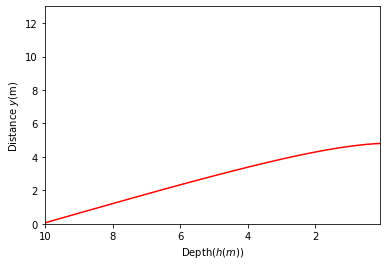

In [41]:
import matplotlib.pyplot as plt
import numpy as np
import math
  
# Plotting both the curves simultaneously
plt.plot(h, added_h_Y_b_30, color='r', label="$y$(m)")
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Depth($h(m)$)")
plt.ylabel("Distance $y$(m)")

plt.axis([max(h),min(h),min(added_h_Y_b_30),max(added_h_Y_b_30)])

plt.ylim(0, 13)
  
# To load the display window
plt.show()

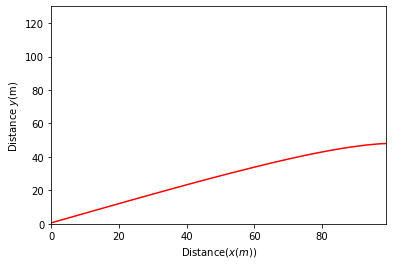

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import math
  
# Plotting both the curves simultaneously
plt.plot(X, added_x_Y_b_30, color='r', label="$y$(m)")
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Distance($x(m)$)")
plt.ylabel("Distance $y$(m)")

plt.axis([min(X),max(X),min(added_x_Y_b_30),max(added_x_Y_b_30)])

plt.ylim(0, 130)
  
# To load the display window
plt.show()

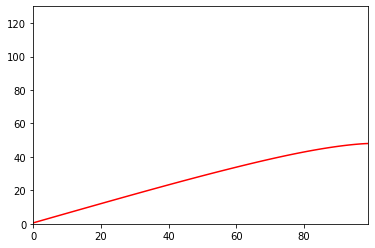

In [43]:
import matplotlib.pyplot as plt
import numpy as np
import math
  
# Plotting both the curves simultaneously
plt.plot(X, added_x_Y_b_30, color='r', label="$y$(m)")

plt.axis([min(X),max(X),min(added_x_Y_b_30),max(added_x_Y_b_30)])

plt.ylim(0, 130)
  
# To load the display window
plt.show()

In [44]:
# abs_Eckart_H = 0
# abs_Hunt_H = 0 

In [45]:
# for i in range(0, len(Bisection_H)):
#     abs_Eckart_H += abs(Bisection_H[i] - Eckart_H[i])
#     abs_Hunt_H += abs(Bisection_H[i] - Hunt_H[i])
    

In [46]:
# mean_abs_Eckart_H = abs_Eckart_H / len(Bisection_H)
# mean_abs_Hunt_H = abs_Hunt_H / len(Bisection_H)

In [47]:
# mean_abs_Eckart_H * 100

In [48]:
# mean_abs_Hunt_H * 100

In [49]:
# len(hunt_k)

In [50]:
# len(k)

In [51]:
h

[10,
 9.9,
 9.8,
 9.7,
 9.6,
 9.5,
 9.4,
 9.3,
 9.2,
 9.1,
 9.0,
 8.9,
 8.8,
 8.7,
 8.6,
 8.5,
 8.4,
 8.3,
 8.2,
 8.1,
 8.0,
 7.9,
 7.8,
 7.7,
 7.6,
 7.5,
 7.4,
 7.3,
 7.2,
 7.1,
 7.0,
 6.9,
 6.8,
 6.7,
 6.6,
 6.5,
 6.4,
 6.3,
 6.2,
 6.1,
 6.0,
 5.9,
 5.8,
 5.7,
 5.6,
 5.5,
 5.4,
 5.3,
 5.2,
 5.1,
 5.0,
 4.9,
 4.8,
 4.7,
 4.6,
 4.5,
 4.4,
 4.3,
 4.2,
 4.1,
 4.0,
 3.9,
 3.8,
 3.7,
 3.6,
 3.5,
 3.4,
 3.3,
 3.2,
 3.1,
 3.0,
 2.9,
 2.8,
 2.7,
 2.6,
 2.5,
 2.4,
 2.3,
 2.2,
 2.1,
 2.0,
 1.9,
 1.8,
 1.7,
 1.6,
 1.5,
 1.4,
 1.3,
 1.2,
 1.1,
 1.0,
 0.9,
 0.8,
 0.7,
 0.6,
 0.5,
 0.4,
 0.3,
 0.2,
 0.1]

/home/hexk0131/anaconda3/lib/python3.9/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


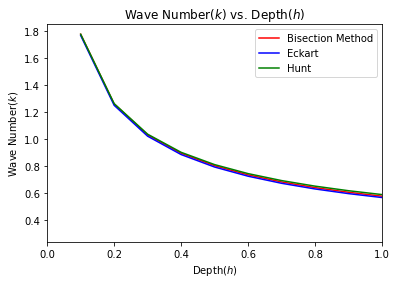

In [52]:
import matplotlib.pyplot as plt
import numpy as np
import math
  
# Plotting both the curves simultaneously
plt.plot(h, bisection_k, color='r', label='Bisection Method')
plt.plot(h, eckart_k, color='b', label='Eckart')
plt.plot(h, hunt_k, color='g', label='Hunt')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Depth($h$)")
plt.ylabel("Wave Number($k$)")
plt.title("Wave Number($k$) vs. Depth($h$)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
plt.xlim(0, 1)
  
# To load the display window
plt.show()

In [53]:
abs_Hunt_k = 0
abs_Eckart_k = 0

In [54]:
for i in range(0, len(hunt_k)):
    abs_Hunt_k += abs(hunt_k[i] - bisection_k[i])
    abs_Eckart_k += abs(eckart_k[i] - bisection_k[i])


In [55]:
mean_abs_Hunt_k = abs_Hunt_k / len(bisection_k)
mean_abs_Eckart_k = abs_Eckart_k / len(bisection_k)

In [56]:
mean_abs_Hunt_k * 100

array([0.37930637])

In [57]:
mean_abs_Eckart_k * 100

array([0.64951202])

In [58]:
Bisection_C = []
Eckart_C = []
Hunt_C = []

In [59]:
for i in range(0, len(bisection_k)):
    Bisection_C.append((2 * math.pi / bisection_k[i])/T0)

In [60]:
for i in range(0, len(eckart_k)):
    Eckart_C.append((2 * math.pi / eckart_k[i])/T0)

In [61]:
for i in range(0, len(hunt_k)):
    Hunt_C.append((2 * math.pi / hunt_k[i])/T0)

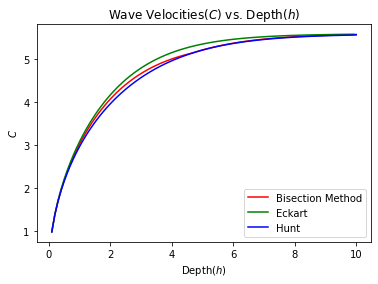

In [62]:
import matplotlib.pyplot as plt
import numpy as np
import math
  
# Plotting both the curves simultaneously
plt.plot(h, Bisection_C, color='r', label='Bisection Method')
plt.plot(h, Eckart_C, color='g', label='Eckart')
plt.plot(h, Hunt_C, color='b', label='Hunt')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Depth($h$)")
plt.ylabel("$C$")
plt.title("Wave Velocities($C$) vs. Depth($h$)")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

In [63]:
abs_Eckart_C = 0
abs_Hunt_C = 0

In [64]:
for i in range(0, len(Bisection_C)):
    abs_Eckart_C += abs(Bisection_C[i] - Eckart_C[i])
    abs_Hunt_C += abs(Bisection_C[i] - Hunt_C[i])

In [65]:
mean_abs_Eckart_C = abs_Eckart_C / len(Eckart_C)
mean_abs_Hunt_C = abs_Hunt_C / len(Hunt_C)

In [66]:
mean_abs_Eckart_C * 100

array([7.72149906])

In [67]:
mean_abs_Hunt_C * 100

array([3.43992334])

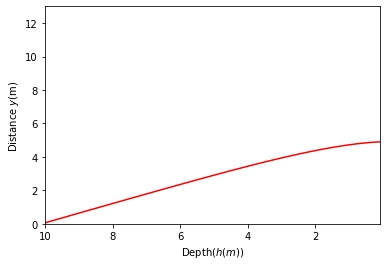

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import math
  
# Plotting both the curves simultaneously
plt.plot(h, added_h_Y_e_30, color='r', label="$y$(m)")
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Depth($h(m)$)")
plt.ylabel("Distance $y$(m)")

plt.axis([max(h),min(h),min(added_h_Y_e_30),max(added_h_Y_e_30)])

plt.ylim(0, 13)
  
# To load the display window
plt.show()

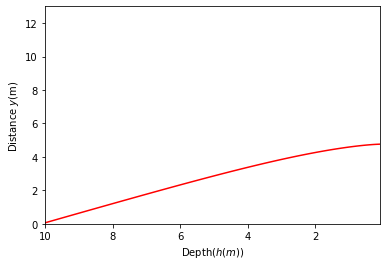

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import math
  
# Plotting both the curves simultaneously
plt.plot(h, added_h_Y_h_30, color='r', label="$y$(m)")

  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Depth($h(m)$)")
plt.ylabel("Distance $y$(m)")

plt.axis([max(h),min(h),min(added_h_Y_h_30),max(added_h_Y_h_30)])

plt.ylim(0, 13)
  
# To load the display window
plt.show()

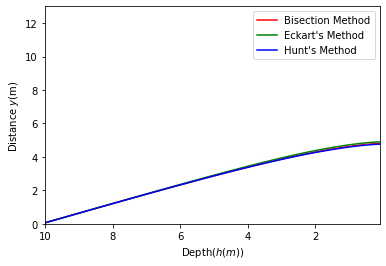

In [175]:
import matplotlib.pyplot as plt
import numpy as np
import math
  
# Plotting both the curves simultaneously
plt.plot(h, added_h_Y_b_30, color='r', label="Bisection Method")
plt.plot(h, added_h_Y_e_30, color='g', label="Eckart's Method")
plt.plot(h, added_h_Y_h_30, color='b', label="Hunt's Method")
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Depth($h(m)$)")
plt.ylabel("Distance $y$(m)")

plt.axis([max(h),min(h),min(added_h_Y_h_30),max(added_h_Y_h_30)])

plt.ylim(0, 13)

plt.legend()
  
# To load the display window
plt.show()

In [70]:
abs_Eckart_angle = 0
abs_Hunt_angle = 0

In [71]:
len(angle_bisection)

100

In [72]:
len(angle_eckart)

100

In [73]:
len(angle_hunt)

100

In [74]:
angle_bisection

[0.5235987755982988,
 array([0.52346266]),
 array([0.52331746]),
 array([0.52316409]),
 array([0.523]),
 array([0.52282712]),
 array([0.52264288]),
 array([0.52244802]),
 array([0.52224105]),
 array([0.52202158]),
 array([0.52178805]),
 array([0.52154113]),
 array([0.52127922]),
 array([0.52100181]),
 array([0.52070726]),
 array([0.52039611]),
 array([0.52006553]),
 array([0.51971598]),
 array([0.5193457]),
 array([0.51895286]),
 array([0.5185378]),
 array([0.51809863]),
 array([0.51763451]),
 array([0.51714343]),
 array([0.51662337]),
 array([0.51607443]),
 array([0.51549446]),
 array([0.51488235]),
 array([0.51423477]),
 array([0.51355157]),
 array([0.51283038]),
 array([0.51206981]),
 array([0.51126737]),
 array([0.51042153]),
 array([0.50953069]),
 array([0.50859106]),
 array([0.50760192]),
 array([0.50656036]),
 array([0.50546442]),
 array([0.50431102]),
 array([0.50309799]),
 array([0.50182307]),
 array([0.50048286]),
 array([0.49907587]),
 array([0.49759746]),
 array([0.49604589

In [75]:
angle_eckart

[0.5235987755982988,
 array([0.52458121]),
 array([0.52450514]),
 array([0.52442417]),
 array([0.52433798]),
 array([0.52424625]),
 array([0.52414861]),
 array([0.52404469]),
 array([0.52393409]),
 array([0.52381637]),
 array([0.52369108]),
 array([0.52355774]),
 array([0.52341583]),
 array([0.5232648]),
 array([0.52310407]),
 array([0.52293302]),
 array([0.522751]),
 array([0.52255731]),
 array([0.5223512]),
 array([0.52213188]),
 array([0.52189851]),
 array([0.5216502]),
 array([0.52138601]),
 array([0.52110493]),
 array([0.52080589]),
 array([0.52048776]),
 array([0.52014933]),
 array([0.51978933]),
 array([0.51940639]),
 array([0.51899909]),
 array([0.51856589]),
 array([0.51810517]),
 array([0.51761523]),
 array([0.51709423]),
 array([0.51654026]),
 array([0.51595126]),
 array([0.51532508]),
 array([0.51465943]),
 array([0.51395188]),
 array([0.51319987]),
 array([0.51240067]),
 array([0.51155144]),
 array([0.51064912]),
 array([0.50969053]),
 array([0.50867228]),
 array([0.507590

In [76]:
for i in range(0, len(angle_bisection)):
    abs_Eckart_angle += abs(angle_bisection[i] - angle_eckart[i])
    abs_Hunt_angle += abs(angle_bisection[i] - angle_hunt[i])

In [77]:
mean_abs_Eckart_angle = abs_Eckart_angle / len(angle_eckart)
mean_abs_Hunt_angle = abs_Hunt_angle / len(angle_hunt)

In [78]:
mean_abs_Eckart_angle * 100

array([0.77287975])

In [79]:
mean_abs_Hunt_angle * 100

array([0.33519741])

## Question 2

1. 입사파의 각도가 $45^{\circ}$인 경우

In [80]:
init_angle = 45

In [81]:
C1 = sigma / k0

In [82]:
C1

5.577615166155759

In [83]:
angle_bisection = []
angle_eckart = []
angle_hunt = []
degree_angle = []
tanv_bisection = []
tanv_hunt = []
tanv_eckart = []

h = []
bisection_k = []
eckart_k = []
hunt_k = []
hunt_y_45 = []

In [84]:
a1 = init_angle * np.pi / 180

In [85]:
h.append(h0)
angle_bisection.append(a1)
angle_eckart.append(a1)
angle_hunt.append(a1)
degree_angle.append(a1 * 180 / math.pi)
tanv_bisection.append(np.tan(a1))
tanv_eckart.append(np.tan(a1))
tanv_hunt.append(np.tan(a1))
bisection_k.append(k0)
eckart_k.append(k0)
hunt_k.append(k0)

In [86]:
d = [0.6666666666, 0.3555555555, 0.1608465608, 0.0632098765, 0.0217540484, 0.0076507983]

In [87]:
def f(x, sqr_omega, h1):
    return g * (x / sqr_omega) * np.tanh([x*h1]) - 1

In [88]:
def bisection_method(k_init, sqr_omega, h1):
    error=0.5 * 10**(-6)

    a = -0.01 + k_init
    b = 0.01 + k_init
    
    while (b - a) / 2 > error:
        c = (b + a) / 2
        if f(c, sqr_omega, h1) == 0:
            break
        elif f(a, sqr_omega, h1)*f(c, sqr_omega, h1) > 0:
            a = c
        else:
            b = c
    c = (b + a) / 2

    return c

In [89]:
hunt_y_45.append(sqr_sigma*h0/g)

기본적으로 np.arcsin의 경우 Radians값을 반환함. np.sin의 경우 그 인자로 Angles이 아닌, Radians 값을 대입함.

In [90]:
for i in range(0, 99):
    h1 = round(10 - (1/10)*(i+1), 2)
    k_init = sqr_sigma / (g * math.sqrt(np.tanh(sqr_sigma / g * h1)))
    k2 = abs(bisection_method(k_init, sqr_sigma, h1))
    C2 = sigma / k2
    a2_bisection = np.arcsin(C2 / C1 * np.sin([init_angle * np.pi / 180]))
    y = sqr_sigma*h1/g
    hunt_y_45.append(y)
    
    dny = 0
    
    for j in range(0, len(d)):
        dny += d[j] * (y ** (j+1))

    k1 = math.sqrt(((y) ** 2 + ((y) / (1 + dny))) / (h1 ** 2))
    C2_Hunt = sigma / k1
    C2_Eckart = sigma / k_init
    a2_hunt = np.arcsin(C2_Hunt / C1 * np.sin([init_angle * np.pi / 180]))
    a2_eckart = np.arcsin(C2_Eckart / C1 * np.sin([init_angle * np.pi / 180]))
    
    hunt_k.append(k1)
    eckart_k.append(k_init)
    bisection_k.append(k2)
    h.append(h1)
    angle_bisection.append(a2_bisection)
    angle_eckart.append(a2_eckart)
    angle_hunt.append(a2_hunt)

    tanv_bisection.append(np.tan(a2_bisection))
    tanv_eckart.append(np.tan(a2_eckart))
    tanv_hunt.append(np.tan(a2_hunt))

In [91]:
abs(eckart_k[1] - bisection_k[1])*100

array([0.0607605])

In [92]:
angle_bisection

[0.7853981633974483,
 array([0.78516243]),
 array([0.78491099]),
 array([0.78464545]),
 array([0.78436141]),
 array([0.78406222]),
 array([0.78374341]),
 array([0.78340631]),
 array([0.78304836]),
 array([0.78266885]),
 array([0.78226516]),
 array([0.78183843]),
 array([0.78138592]),
 array([0.7809068]),
 array([0.78039823]),
 array([0.77986116]),
 array([0.77929078]),
 array([0.77868791]),
 array([0.77804953]),
 array([0.77737255]),
 array([0.77665762]),
 array([0.77590151]),
 array([0.77510283]),
 array([0.77425823]),
 array([0.77336429]),
 array([0.77242126]),
 array([0.77142555]),
 array([0.77037535]),
 array([0.76926506]),
 array([0.76809456]),
 array([0.7668599]),
 array([0.76555889]),
 array([0.7641874]),
 array([0.76274303]),
 array([0.76122322]),
 array([0.75962173]),
 array([0.75793759]),
 array([0.75616609]),
 array([0.75430421]),
 array([0.75234698]),
 array([0.75029109]),
 array([0.74813308]),
 array([0.74586757]),
 array([0.74349249]),
 array([0.74100046]),
 array([0.7383

In [93]:
angle_bisection[1] * 180 / math.pi

array([44.98649347])

In [94]:
tanv_bisection[1]

array([0.99952864])

In [95]:
len(h)

100

In [96]:
X = np.arange(0, 100)

In [97]:
DeltaX = round(abs(X[0] - X[1]), 1)

In [98]:
DeltaX

1

In [99]:
Deltah = round(abs(h[0] - h[1]), 1)

In [100]:
Deltah 

0.1

In [101]:
Y_45 = []
x_Y_45 = []

In [102]:
added_x_Y_b_45 = []
added_x_Y_e_45 = []
added_x_Y_h_45 = []

In [103]:
added_h_Y_b_45 = []
added_h_Y_e_45 = []
added_h_Y_h_45 = []

In [104]:
added_x_Y_b_v_45 = 0
added_x_Y_e_v_45 = 0
added_x_Y_h_v_45 = 0

In [105]:
added_h_Y_b_v_45 = 0
added_h_Y_e_v_45 = 0
added_h_Y_h_v_45 = 0

In [106]:
len(tanv_bisection)

100

In [107]:
for i in range(0, len(tanv_bisection)):
    added_x_Y_b_v_45 += (tanv_bisection[i] * DeltaX).item()
    added_x_Y_e_v_45 += (tanv_eckart[i] * DeltaX).item()
    added_x_Y_h_v_45 += (tanv_hunt[i] * DeltaX).item()
    added_x_Y_b_45.append(added_x_Y_b_v_45)
    added_x_Y_e_45.append(added_x_Y_e_v_45)
    added_x_Y_h_45.append(added_x_Y_h_v_45)

In [108]:
for i in range(0, len(tanv_bisection)):
    added_h_Y_b_v_45 += (tanv_bisection[i] * Deltah).item()
    added_h_Y_e_v_45 += (tanv_eckart[i] * Deltah).item()
    added_h_Y_h_v_45 += (tanv_hunt[i] * Deltah).item()
    added_h_Y_b_45.append(added_h_Y_b_v_45)
    added_h_Y_e_45.append(added_h_Y_e_v_45)
    added_h_Y_h_45.append(added_h_Y_h_v_45)

In [109]:
added_h_Y_h_45

[0.09999999999999999,
 0.1996807042699594,
 0.29930745659857927,
 0.3988773462309304,
 0.4983873010347343,
 0.5978340788630517,
 0.6972142585277168,
 0.7965242303763529,
 0.895760186467154,
 0.994918110337184,
 1.0939937663617714,
 1.1929826887046668,
 1.2918801698610067,
 1.3906812487978082,
 1.489380698699719,
 1.587973014331079,
 1.6864523990290288,
 1.7848127513464183,
 1.8830476513676606,
 1.9811503467253924,
 2.079113738350876,
 2.176930365996469,
 2.2745923935741685,
 2.3720915943601852,
 2.4694193361216596,
 2.5665665662279378,
 2.6635237968152135,
 2.7602810900797214,
 2.8568280437809292,
 2.953153777042224,
 3.0492469165422538,
 3.1450955831952725,
 3.240687379423316,
 3.3360093771267234,
 3.4310481064621308,
 3.5257895455385015,
 3.6202191111417603,
 3.714321650597016,
 3.8080814348739764,
 3.9014821530358184,
 3.9945069081243054,
 4.087138214564228,
 4.1793579971581405,
 4.271147591727846,
 4.362487747442108,
 4.4533586308506115,
 4.543739831622427,
 4.633610369963159,
 4.7

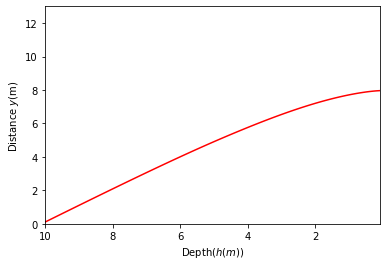

In [110]:
import matplotlib.pyplot as plt
import numpy as np
import math
  
# Plotting both the curves simultaneously
plt.plot(h, added_h_Y_b_45, color='r', label="$y$(m)")
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Depth($h(m)$)")
plt.ylabel("Distance $y$(m)")

plt.axis([max(h),min(h),min(added_h_Y_b_45),max(added_h_Y_b_45)])

plt.ylim(0, 13)
  
# To load the display window
plt.show()

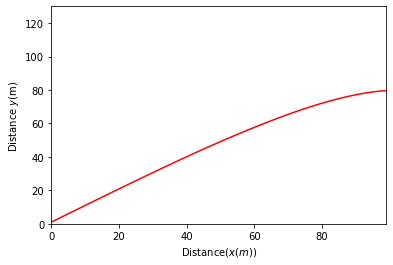

In [111]:
import matplotlib.pyplot as plt
import numpy as np
import math
  
# Plotting both the curves simultaneously
plt.plot(X, added_x_Y_b_45, color='r', label="$y$(m)")
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Distance($x(m)$)")
plt.ylabel("Distance $y$(m)")

plt.axis([min(X),max(X),min(added_x_Y_b_45),max(added_x_Y_b_45)])

plt.ylim(0, 130)
  
# To load the display window
plt.show()

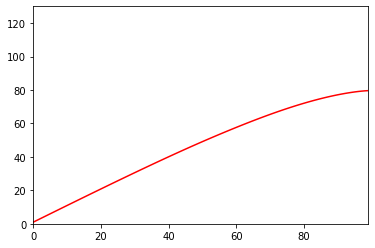

In [112]:
import matplotlib.pyplot as plt
import numpy as np
import math
  
# Plotting both the curves simultaneously
plt.plot(X, added_x_Y_b_45, color='r', label="$y$(m)")

plt.axis([min(X),max(X),min(added_x_Y_b_45),max(added_x_Y_b_45)])

plt.ylim(0, 130)
  
# To load the display window
plt.show()

In [113]:
h

[10,
 9.9,
 9.8,
 9.7,
 9.6,
 9.5,
 9.4,
 9.3,
 9.2,
 9.1,
 9.0,
 8.9,
 8.8,
 8.7,
 8.6,
 8.5,
 8.4,
 8.3,
 8.2,
 8.1,
 8.0,
 7.9,
 7.8,
 7.7,
 7.6,
 7.5,
 7.4,
 7.3,
 7.2,
 7.1,
 7.0,
 6.9,
 6.8,
 6.7,
 6.6,
 6.5,
 6.4,
 6.3,
 6.2,
 6.1,
 6.0,
 5.9,
 5.8,
 5.7,
 5.6,
 5.5,
 5.4,
 5.3,
 5.2,
 5.1,
 5.0,
 4.9,
 4.8,
 4.7,
 4.6,
 4.5,
 4.4,
 4.3,
 4.2,
 4.1,
 4.0,
 3.9,
 3.8,
 3.7,
 3.6,
 3.5,
 3.4,
 3.3,
 3.2,
 3.1,
 3.0,
 2.9,
 2.8,
 2.7,
 2.6,
 2.5,
 2.4,
 2.3,
 2.2,
 2.1,
 2.0,
 1.9,
 1.8,
 1.7,
 1.6,
 1.5,
 1.4,
 1.3,
 1.2,
 1.1,
 1.0,
 0.9,
 0.8,
 0.7,
 0.6,
 0.5,
 0.4,
 0.3,
 0.2,
 0.1]

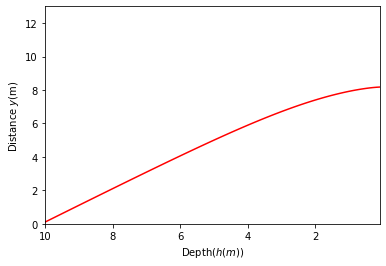

In [114]:
import matplotlib.pyplot as plt
import numpy as np
import math
  
# Plotting both the curves simultaneously
plt.plot(h, added_h_Y_e_45, color='r', label="$y$(m)")
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Depth($h(m)$)")
plt.ylabel("Distance $y$(m)")

plt.axis([max(h),min(h),min(added_h_Y_e_45),max(added_h_Y_e_45)])

plt.ylim(0, 13)
  
# To load the display window
plt.show()

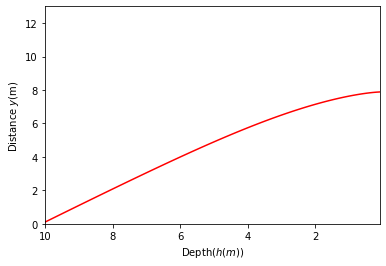

In [115]:
import matplotlib.pyplot as plt
import numpy as np
import math
  
# Plotting both the curves simultaneously
plt.plot(h, added_h_Y_h_45, color='r', label="$y$(m)")

  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Depth($h(m)$)")
plt.ylabel("Distance $y$(m)")

plt.axis([max(h),min(h),min(added_h_Y_h_45),max(added_h_Y_h_45)])

plt.ylim(0, 13)
  
# To load the display window
plt.show()

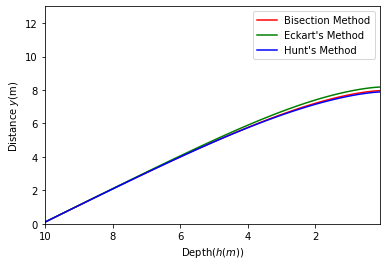

In [174]:
import matplotlib.pyplot as plt
import numpy as np
import math
  
# Plotting both the curves simultaneously
plt.plot(h, added_h_Y_b_45, color='r', label="Bisection Method")
plt.plot(h, added_h_Y_e_45, color='g', label="Eckart's Method")
plt.plot(h, added_h_Y_h_45, color='b', label="Hunt's Method")
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Depth($h(m)$)")
plt.ylabel("Distance $y$(m)")

plt.axis([max(h),min(h),min(added_h_Y_h_45),max(added_h_Y_h_45)])

plt.ylim(0, 13)

plt.legend()
  
# To load the display window
plt.show()

In [116]:
abs_Eckart_angle = 0
abs_Hunt_angle = 0

In [117]:
len(angle_bisection)

100

In [118]:
len(angle_eckart)

100

In [119]:
len(angle_hunt)

100

In [120]:
angle_bisection

[0.7853981633974483,
 array([0.78516243]),
 array([0.78491099]),
 array([0.78464545]),
 array([0.78436141]),
 array([0.78406222]),
 array([0.78374341]),
 array([0.78340631]),
 array([0.78304836]),
 array([0.78266885]),
 array([0.78226516]),
 array([0.78183843]),
 array([0.78138592]),
 array([0.7809068]),
 array([0.78039823]),
 array([0.77986116]),
 array([0.77929078]),
 array([0.77868791]),
 array([0.77804953]),
 array([0.77737255]),
 array([0.77665762]),
 array([0.77590151]),
 array([0.77510283]),
 array([0.77425823]),
 array([0.77336429]),
 array([0.77242126]),
 array([0.77142555]),
 array([0.77037535]),
 array([0.76926506]),
 array([0.76809456]),
 array([0.7668599]),
 array([0.76555889]),
 array([0.7641874]),
 array([0.76274303]),
 array([0.76122322]),
 array([0.75962173]),
 array([0.75793759]),
 array([0.75616609]),
 array([0.75430421]),
 array([0.75234698]),
 array([0.75029109]),
 array([0.74813308]),
 array([0.74586757]),
 array([0.74349249]),
 array([0.74100046]),
 array([0.7383

In [121]:
angle_eckart

[0.7853981633974483,
 array([0.78710075]),
 array([0.78696885]),
 array([0.78682847]),
 array([0.78667906]),
 array([0.78652004]),
 array([0.78635082]),
 array([0.78617072]),
 array([0.78597906]),
 array([0.78577509]),
 array([0.78555805]),
 array([0.78532708]),
 array([0.78508132]),
 array([0.78481981]),
 array([0.78454155]),
 array([0.78424549]),
 array([0.7839305]),
 array([0.78359537]),
 array([0.78323885]),
 array([0.78285956]),
 array([0.7824561]),
 array([0.78202692]),
 array([0.78157042]),
 array([0.78108488]),
 array([0.7805685]),
 array([0.78001934]),
 array([0.77943535]),
 array([0.77881439]),
 array([0.77815415]),
 array([0.7774522]),
 array([0.77670598]),
 array([0.77591276]),
 array([0.77506967]),
 array([0.77417364]),
 array([0.77322147]),
 array([0.77220975]),
 array([0.77113488]),
 array([0.76999306]),
 array([0.76878029]),
 array([0.76749233]),
 array([0.76612472]),
 array([0.76467278]),
 array([0.76313154]),
 array([0.76149581]),
 array([0.75976011]),
 array([0.75791

In [122]:
for i in range(0, len(angle_bisection)):
    abs_Eckart_angle += abs(angle_bisection[i] - angle_eckart[i])
    abs_Hunt_angle += abs(angle_bisection[i] - angle_hunt[i])

In [123]:
mean_abs_Eckart_angle = abs_Eckart_angle / len(angle_eckart)
mean_abs_Hunt_angle = abs_Hunt_angle / len(angle_hunt)

In [124]:
mean_abs_Eckart_angle * 100

array([1.2659064])

In [125]:
mean_abs_Hunt_angle * 100

array([0.52660238])

## Question 3

1. 입사파의 각도가 $60^{\circ}$인 경우

In [126]:
init_angle = 60

In [127]:
C1 = sigma / k0

In [128]:
C1

5.577615166155759

In [129]:
angle_bisection = []
angle_eckart = []
angle_hunt = []
degree_angle = []
tanv_bisection = []
tanv_hunt = []
tanv_eckart = []

h = []
bisection_k = []
eckart_k = []
hunt_k = []
hunt_y_60 = []

In [130]:
a1 = init_angle * np.pi / 180

In [131]:
h.append(h0)
angle_bisection.append(a1)
angle_eckart.append(a1)
angle_hunt.append(a1)
degree_angle.append(a1 * 180 / math.pi)
tanv_bisection.append(np.tan(a1))
tanv_eckart.append(np.tan(a1))
tanv_hunt.append(np.tan(a1))
bisection_k.append(k0)
eckart_k.append(k0)
hunt_k.append(k0)

In [132]:
d = [0.6666666666, 0.3555555555, 0.1608465608, 0.0632098765, 0.0217540484, 0.0076507983]

In [133]:
def f(x, sqr_omega, h1):
    return g * (x / sqr_omega) * np.tanh([x*h1]) - 1

In [134]:
def bisection_method(k_init, sqr_omega, h1):
    error=0.5 * 10**(-6)

    a = -0.01 + k_init
    b = 0.01 + k_init
    
    while (b - a) / 2 > error:
        c = (b + a) / 2
        if f(c, sqr_omega, h1) == 0:
            break
        elif f(a, sqr_omega, h1)*f(c, sqr_omega, h1) > 0:
            a = c
        else:
            b = c
    c = (b + a) / 2

    return c

In [135]:
hunt_y_60.append(sqr_sigma*h0/g)

기본적으로 np.arcsin의 경우 Radians값을 반환함. np.sin의 경우 그 인자로 Angles이 아닌, Radians 값을 대입함.

In [136]:
for i in range(0, 99):
    h1 = round(10 - (1/10)*(i+1), 2)
    k_init = sqr_sigma / (g * math.sqrt(np.tanh(sqr_sigma / g * h1)))
    k2 = abs(bisection_method(k_init, sqr_sigma, h1))
    C2 = sigma / k2
    print(C2)
    a2_bisection = np.arcsin(C2 / C1 * np.sin([init_angle * np.pi / 180]))
    y = sqr_sigma*h1/g
    hunt_y_60.append(y)
    
    dny = 0
    
    for j in range(0, len(d)):
        dny += d[j] * (y ** (j+1))

    k1 = math.sqrt(((y) ** 2 + ((y) / (1 + dny))) / (h1 ** 2))
    C2_Hunt = sigma / k1
    C2_Eckart = sigma / k_init
    a2_hunt = np.arcsin(C2_Hunt / C1 * np.sin([init_angle * np.pi / 180]))
    a2_eckart = np.arcsin(C2_Eckart / C1 * np.sin([init_angle * np.pi / 180]))
    
    hunt_k.append(k1)
    eckart_k.append(k_init)
    bisection_k.append(k2)
    h.append(h1)
    angle_bisection.append(a2_bisection)
    angle_eckart.append(a2_eckart)
    angle_hunt.append(a2_hunt)

    tanv_bisection.append(np.tan(a2_bisection))
    tanv_eckart.append(np.tan(a2_eckart))
    tanv_hunt.append(np.tan(a2_hunt))

[5.57630018]
[5.57489725]
[5.57341524]
[5.57182958]
[5.57015879]
[5.56837794]
[5.56649434]
[5.56449347]
[5.56237138]
[5.56011312]
[5.55772502]
[5.55519161]
[5.55250789]
[5.54965783]
[5.54664657]
[5.5434467]
[5.54006266]
[5.53647708]
[5.53267223]
[5.52865132]
[5.52439577]
[5.5198972]
[5.51513614]
[5.51009264]
[5.5047674]
[5.49913937]
[5.49319747]
[5.486909]
[5.48027214]
[5.47326338]
[5.46586896]
[5.45806394]
[5.44983303]
[5.44116002]
[5.43200724]
[5.42236705]
[5.41221025]
[5.40151688]
[5.39025577]
[5.37840479]
[5.36594063]
[5.35282871]
[5.33905317]
[5.32456691]
[5.3093513]
[5.29337617]
[5.27660979]
[5.25900911]
[5.2405392]
[5.22118229]
[5.20088051]
[5.17960261]
[5.15731502]
[5.13725219]
[5.11913037]
[5.09989741]
[5.07948867]
[5.05783614]
[5.03486828]
[5.01050989]
[4.98468194]
[4.95730145]
[4.92828128]
[4.89752998]
[4.86495161]
[4.83044554]
[4.7939062]
[4.7552229]
[4.71427949]
[4.67095412]
[4.62511883]
[4.57663915]
[4.52537359]
[4.47117307]
[4.41388014]
[4.35332812]
[4.28933999]
[4.22172

In [137]:
tanv_bisection

[1.7320508075688767,
 array([1.73041914]),
 array([1.72868215]),
 array([1.7268515]),
 array([1.72489763]),
 array([1.72284423]),
 array([1.7206616]),
 array([1.71835977]),
 array([1.71592218]),
 array([1.71334535]),
 array([1.71061267]),
 array([1.70773345]),
 array([1.70469085]),
 array([1.70148089]),
 array([1.6980867]),
 array([1.69451686]),
 array([1.69074169]),
 array([1.68676952]),
 array([1.6825833]),
 array([1.6781662]),
 array([1.67352607]),
 array([1.66864595]),
 array([1.66352117]),
 array([1.658135]),
 array([1.65247097]),
 array([1.64653646]),
 array([1.64031505]),
 array([1.63380221]),
 array([1.62697066]),
 array([1.61982774]),
 array([1.61235812]),
 array([1.60455791]),
 array([1.59641252]),
 array([1.58791856]),
 array([1.57907275]),
 array([1.56985128]),
 array([1.56026214]),
 array([1.55029289]),
 array([1.53994172]),
 array([1.5291974]),
 array([1.51805904]),
 array([1.50652597]),
 array([1.49458876]),
 array([1.48225665]),
 array([1.46951251]),
 array([1.45636636]

In [138]:
angle_bisection

[1.0471975511965976,
 array([1.04678935]),
 array([1.04635416]),
 array([1.04589479]),
 array([1.0454037]),
 array([1.0448867]),
 array([1.04433615]),
 array([1.04375439]),
 array([1.04313706]),
 array([1.04248304]),
 array([1.04178785]),
 array([1.0410536]),
 array([1.04027566]),
 array([1.0394527]),
 array([1.03858]),
 array([1.03765933]),
 array([1.03668257]),
 array([1.03565134]),
 array([1.03456065]),
 array([1.03340545]),
 array([1.03218707]),
 array([1.0309003]),
 array([1.02954304]),
 array([1.02810991]),
 array([1.02659548]),
 array([1.02500055]),
 array([1.02331947]),
 array([1.02154965]),
 array([1.01968217]),
 array([1.01771735]),
 array([1.0156492]),
 array([1.01347471]),
 array([1.01118766]),
 array([1.00878483]),
 array([1.00626283]),
 array([1.00361215]),
 array([1.0008322]),
 array([0.99791625]),
 array([0.99486044]),
 array([0.99165785]),
 array([0.98830436]),
 array([0.98479568]),
 array([0.98112456]),
 array([0.97728921]),
 array([0.97327936]),
 array([0.96909291]),

In [139]:
bisection_k

[0.3141592653589793,
 array([0.31423335]),
 array([0.31431243]),
 array([0.314396]),
 array([0.31448548]),
 array([0.31457981]),
 array([0.31468042]),
 array([0.3147869]),
 array([0.31490009]),
 array([0.31502022]),
 array([0.31514817]),
 array([0.31528359]),
 array([0.31542737]),
 array([0.31557983]),
 array([0.3157419]),
 array([0.31591331]),
 array([0.31609567]),
 array([0.31628875]),
 array([0.31649359]),
 array([0.31671124]),
 array([0.31694158]),
 array([0.31718573]),
 array([0.31744422]),
 array([0.31771826]),
 array([0.31800908]),
 array([0.31831672]),
 array([0.31864249]),
 array([0.31898716]),
 array([0.31935275]),
 array([0.3197395]),
 array([0.32014894]),
 array([0.32058205]),
 array([0.32104048]),
 array([0.32152535]),
 array([0.32203785]),
 array([0.32258048]),
 array([0.32315398]),
 array([0.32376042]),
 array([0.32440137]),
 array([0.3250791]),
 array([0.32579539]),
 array([0.32655216]),
 array([0.32735206]),
 array([0.32819667]),
 array([0.32908958]),
 array([0.3300326

In [140]:
abs(eckart_k[1] - bisection_k[1])*100

array([0.0607605])

In [141]:
len(h)

100

In [142]:
X = np.arange(0, 100)

In [143]:
DeltaX = round(abs(X[0] - X[1]), 1)

In [144]:
DeltaX

1

In [145]:
Deltah = round(abs(h[0] - h[1]), 1)

In [146]:
Deltah 

0.1

In [147]:
Y_60 = []
x_Y_60 = []

In [148]:
added_x_Y_b_60 = []
added_x_Y_e_60 = []
added_x_Y_h_60 = []

In [149]:
added_h_Y_b_60 = []
added_h_Y_e_60 = []
added_h_Y_h_60 = []

In [150]:
added_x_Y_b_v_60 = 0
added_x_Y_e_v_60 = 0
added_x_Y_h_v_60 = 0

In [151]:
added_h_Y_b_v_60 = 0
added_h_Y_e_v_60 = 0
added_h_Y_h_v_60 = 0

In [152]:
len(tanv_bisection)

100

In [153]:
for i in range(0, len(tanv_bisection)):
    added_x_Y_b_v_60 += (tanv_bisection[i] * DeltaX).item()
    added_x_Y_e_v_60 += (tanv_eckart[i] * DeltaX).item()
    added_x_Y_h_v_60 += (tanv_hunt[i] * DeltaX).item()
    added_x_Y_b_60.append(added_x_Y_b_v_60)
    added_x_Y_e_60.append(added_x_Y_e_v_60)
    added_x_Y_h_60.append(added_x_Y_h_v_60)

In [154]:
for i in range(0, len(tanv_bisection)):
    added_h_Y_b_v_60 += (tanv_bisection[i] * Deltah).item()
    added_h_Y_e_v_60 += (tanv_eckart[i] * Deltah).item()
    added_h_Y_h_v_60 += (tanv_hunt[i] * Deltah).item()
    added_h_Y_b_60.append(added_h_Y_b_v_60)
    added_h_Y_e_60.append(added_h_Y_e_v_60)
    added_h_Y_h_60.append(added_h_Y_h_v_60)

In [155]:
added_h_Y_h_60

[0.17320508075688767,
 0.34530935251905737,
 0.5172286507516752,
 0.688953316152151,
 0.8604731877542114,
 1.0317775798104718,
 1.2028552580688059,
 1.373694415490396,
 1.5442826474677043,
 1.7146069266119444,
 1.884653577191978,
 2.0544082493198927,
 2.223855892992853,
 2.3929807321160856,
 2.561766238648031,
 2.7301951070256414,
 2.898249229045459,
 3.065909669394247,
 3.2331566420414193,
 3.3999694877240474,
 3.566326652773554,
 3.7322056695509356,
 3.8975831387741726,
 4.062434714036867,
 4.226735088830655,
 4.390457986395003,
 4.553576152726019,
 4.716061353080371,
 4.877884372310478,
 5.039015019362444,
 5.199422136257858,
 5.359073611864185,
 5.517936400735352,
 5.675976547273889,
 5.8331592154282745,
 5.989448724093704,
 6.144808588331324,
 6.299201566460204,
 6.452589713008318,
 6.604934437434133,
 6.756196568449957,
 6.906336423693021,
 7.055313884401755,
 7.20308847466437,
 7.349619444716461,
 7.494865857675879,
 7.638786679018505,
 7.781340868019932,
 7.922487470317439,
 8.

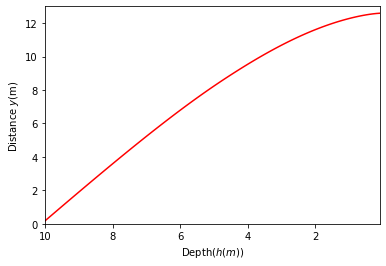

In [156]:
import matplotlib.pyplot as plt
import numpy as np
import math
  
# Plotting both the curves simultaneously
plt.plot(h, added_h_Y_b_60, color='r', label="$y$(m)")
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Depth($h(m)$)")
plt.ylabel("Distance $y$(m)")

plt.axis([max(h),min(h),min(added_h_Y_b_60),max(added_h_Y_b_60)])

plt.ylim(0, 13)
  
# To load the display window
plt.show()

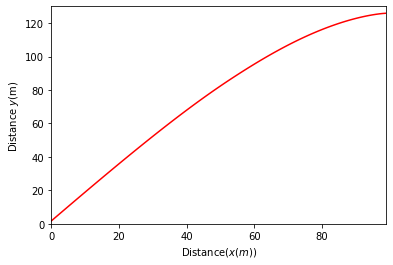

In [157]:
import matplotlib.pyplot as plt
import numpy as np
import math
  
# Plotting both the curves simultaneously
plt.plot(X, added_x_Y_b_60, color='r', label="$y$(m)")
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Distance($x(m)$)")
plt.ylabel("Distance $y$(m)")

plt.axis([min(X),max(X),min(added_x_Y_b_60),max(added_x_Y_b_60)])

plt.ylim(0, 130)
  
# To load the display window
plt.show()

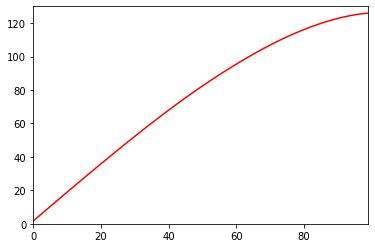

In [158]:
import matplotlib.pyplot as plt
import numpy as np
import math
  
# Plotting both the curves simultaneously
plt.plot(X, added_x_Y_b_60, color='r', label="$y$(m)")

plt.axis([min(X),max(X),min(added_x_Y_b_60),max(added_x_Y_b_60)])

plt.ylim(0, 130)
  
# To load the display window
plt.show()

In [159]:
h

[10,
 9.9,
 9.8,
 9.7,
 9.6,
 9.5,
 9.4,
 9.3,
 9.2,
 9.1,
 9.0,
 8.9,
 8.8,
 8.7,
 8.6,
 8.5,
 8.4,
 8.3,
 8.2,
 8.1,
 8.0,
 7.9,
 7.8,
 7.7,
 7.6,
 7.5,
 7.4,
 7.3,
 7.2,
 7.1,
 7.0,
 6.9,
 6.8,
 6.7,
 6.6,
 6.5,
 6.4,
 6.3,
 6.2,
 6.1,
 6.0,
 5.9,
 5.8,
 5.7,
 5.6,
 5.5,
 5.4,
 5.3,
 5.2,
 5.1,
 5.0,
 4.9,
 4.8,
 4.7,
 4.6,
 4.5,
 4.4,
 4.3,
 4.2,
 4.1,
 4.0,
 3.9,
 3.8,
 3.7,
 3.6,
 3.5,
 3.4,
 3.3,
 3.2,
 3.1,
 3.0,
 2.9,
 2.8,
 2.7,
 2.6,
 2.5,
 2.4,
 2.3,
 2.2,
 2.1,
 2.0,
 1.9,
 1.8,
 1.7,
 1.6,
 1.5,
 1.4,
 1.3,
 1.2,
 1.1,
 1.0,
 0.9,
 0.8,
 0.7,
 0.6,
 0.5,
 0.4,
 0.3,
 0.2,
 0.1]

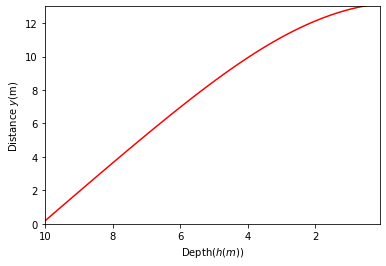

In [160]:
import matplotlib.pyplot as plt
import numpy as np
import math
  
# Plotting both the curves simultaneously
plt.plot(h, added_h_Y_e_60, color='r', label="$y$(m)")
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Depth($h(m)$)")
plt.ylabel("Distance $y$(m)")

plt.axis([max(h),min(h),min(added_h_Y_e_60),max(added_h_Y_e_60)])

plt.ylim(0, 13)
  
# To load the display window
plt.show()

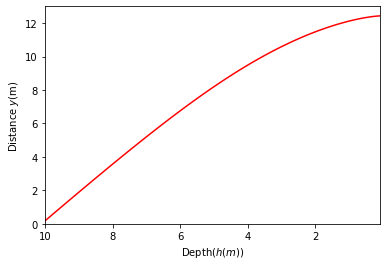

In [161]:
import matplotlib.pyplot as plt
import numpy as np
import math
  
# Plotting both the curves simultaneously
plt.plot(h, added_h_Y_h_60, color='r', label="$y$(m)")

  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Depth($h(m)$)")
plt.ylabel("Distance $y$(m)")

plt.axis([max(h),min(h),min(added_h_Y_h_60),max(added_h_Y_h_60)])

plt.ylim(0, 13)
  
# To load the display window
plt.show()

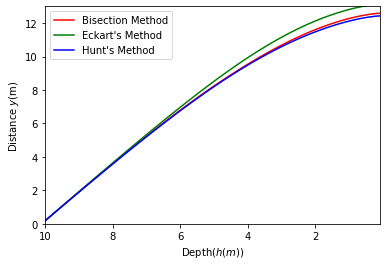

In [173]:
import matplotlib.pyplot as plt
import numpy as np
import math
  
# Plotting both the curves simultaneously
plt.plot(h, added_h_Y_b_60, color='r', label="Bisection Method")
plt.plot(h, added_h_Y_e_60, color='g', label="Eckart's Method")
plt.plot(h, added_h_Y_h_60, color='b', label="Hunt's Method")
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Depth($h(m)$)")
plt.ylabel("Distance $y$(m)")

plt.axis([max(h),min(h),min(added_h_Y_h_60),max(added_h_Y_h_60)])

plt.ylim(0, 13)

plt.legend()
  
# To load the display window
plt.show()

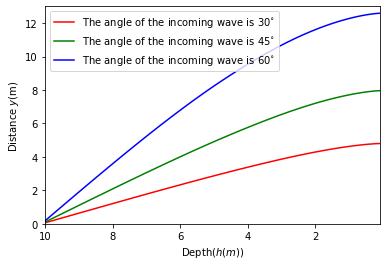

In [176]:
import matplotlib.pyplot as plt
import numpy as np
import math
  
# Plotting both the curves simultaneously
plt.plot(h, added_h_Y_b_30, color='r', label="The angle of the incoming wave is $30^{\circ}$")
plt.plot(h, added_h_Y_b_45, color='g', label="The angle of the incoming wave is $45^{\circ}$")
plt.plot(h, added_h_Y_b_60, color='b', label="The angle of the incoming wave is $60^{\circ}$")
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Depth($h(m)$)")
plt.ylabel("Distance $y$(m)")

plt.axis([max(h),min(h),min(added_h_Y_h_60),max(added_h_Y_h_60)])

plt.ylim(0, 13)

plt.legend()
  
# To load the display window
plt.show()

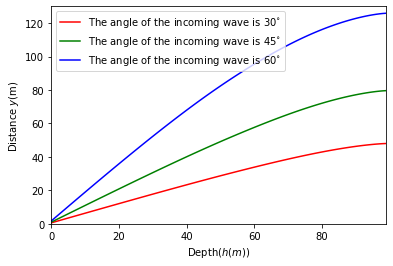

In [179]:
import matplotlib.pyplot as plt
import numpy as np
import math
  
# Plotting both the curves simultaneously
plt.plot(X, added_x_Y_b_30, color='r', label="The angle of the incoming wave is $30^{\circ}$")
plt.plot(X, added_x_Y_b_45, color='g', label="The angle of the incoming wave is $45^{\circ}$")
plt.plot(X, added_x_Y_b_60, color='b', label="The angle of the incoming wave is $60^{\circ}$")
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Depth($h(m)$)")
plt.ylabel("Distance $y$(m)")

plt.axis([min(X),max(X),min(added_x_Y_h_60),max(added_x_Y_h_60)])

plt.ylim(0, 130)

plt.legend()
  
# To load the display window
plt.show()

In [163]:
abs_Eckart_angle = 0
abs_Hunt_angle = 0

In [164]:
len(angle_bisection)

100

In [165]:
len(angle_eckart)

100

In [166]:
len(angle_hunt)

100

In [167]:
angle_bisection

[1.0471975511965976,
 array([1.04678935]),
 array([1.04635416]),
 array([1.04589479]),
 array([1.0454037]),
 array([1.0448867]),
 array([1.04433615]),
 array([1.04375439]),
 array([1.04313706]),
 array([1.04248304]),
 array([1.04178785]),
 array([1.0410536]),
 array([1.04027566]),
 array([1.0394527]),
 array([1.03858]),
 array([1.03765933]),
 array([1.03668257]),
 array([1.03565134]),
 array([1.03456065]),
 array([1.03340545]),
 array([1.03218707]),
 array([1.0309003]),
 array([1.02954304]),
 array([1.02810991]),
 array([1.02659548]),
 array([1.02500055]),
 array([1.02331947]),
 array([1.02154965]),
 array([1.01968217]),
 array([1.01771735]),
 array([1.0156492]),
 array([1.01347471]),
 array([1.01118766]),
 array([1.00878483]),
 array([1.00626283]),
 array([1.00361215]),
 array([1.0008322]),
 array([0.99791625]),
 array([0.99486044]),
 array([0.99165785]),
 array([0.98830436]),
 array([0.98479568]),
 array([0.98112456]),
 array([0.97728921]),
 array([0.97327936]),
 array([0.96909291]),

In [168]:
angle_eckart

[1.0471975511965976,
 array([1.05015157]),
 array([1.04992236]),
 array([1.04967847]),
 array([1.04941898]),
 array([1.04914289]),
 array([1.04884917]),
 array([1.04853669]),
 array([1.04820427]),
 array([1.04785066]),
 array([1.04747452]),
 array([1.04707445]),
 array([1.04664893]),
 array([1.04619639]),
 array([1.04571512]),
 array([1.04520336]),
 array([1.04465919]),
 array([1.04408062]),
 array([1.04346552]),
 array([1.04281164]),
 array([1.04211659]),
 array([1.04137785]),
 array([1.04059276]),
 array([1.0397585]),
 array([1.03887209]),
 array([1.03793038]),
 array([1.03693005]),
 array([1.03586759]),
 array([1.0347393]),
 array([1.03354129]),
 array([1.03226944]),
 array([1.03091944]),
 array([1.02948672]),
 array([1.0279665]),
 array([1.02635376]),
 array([1.0246432]),
 array([1.0228293]),
 array([1.02090624]),
 array([1.01886793]),
 array([1.01670802]),
 array([1.01441984]),
 array([1.01199645]),
 array([1.00943058]),
 array([1.00671469]),
 array([1.0038409]),
 array([1.0008010

In [169]:
for i in range(0, len(angle_bisection)):
    abs_Eckart_angle += abs(angle_bisection[i] - angle_eckart[i])
    abs_Hunt_angle += abs(angle_bisection[i] - angle_hunt[i])

In [170]:
mean_abs_Eckart_angle = abs_Eckart_angle / len(angle_eckart)
mean_abs_Hunt_angle = abs_Hunt_angle / len(angle_hunt)

In [171]:
mean_abs_Eckart_angle * 100

array([1.94232869])

In [172]:
mean_abs_Hunt_angle * 100

array([0.74774457])

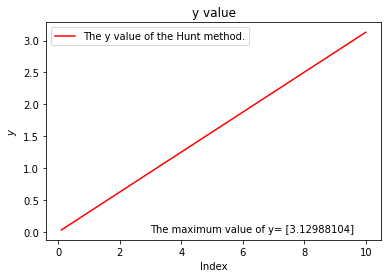

In [187]:
import matplotlib.pyplot as plt
import numpy as np
import math
  
# Plotting both the curves simultaneously
plt.plot(h, hunt_y_30, color='r', label='The y value of the Hunt method.')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Index")
plt.ylabel("$y$")
plt.title("y value")

ymax = max(hunt_y_30)

s = 'The maximum value of y= ' + str(ymax) + ' '

plt.annotate(s, (3, 0))
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()